Muhammad Romadon

#### Goals yang saya inginkan mengetahui jenis kendaraan yang sering dipakai oleh penumpang

import library

In [404]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)


memanggil data dalam bentuk csv

In [405]:
df = pd.read_csv('../data/data-penumpang-bus-transjakarta-desember-2021.csv', sep=',')

menampilkan 5 data di atas

In [406]:
df.head()

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,12,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,43967
1,2021,12,Mikrotrans,JAK.85,Bintara - Cipinang Indah,40103
2,2021,12,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,59193
3,2021,12,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,70475
4,2021,12,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,77697


Melihat jumlah variabel dan observasi

In [428]:
df.shape

(122, 6)

terdapat 122 observasi dan 6 variabel

memeriksa apakah nilai dalam suatu data pada variabel df terdapat NaN (Not a Number) atau null

In [407]:
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

In [408]:
df.isnull().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

di sini terlihat terdapat 2 NaN pda variabel trayek

In [409]:
df.duplicated().sum()

0

tidak ada data yang terduplikasi karena nilai yang keluaar adalah 0

#### Melihat data yang NaN dengan sebuah library missigno

<Axes: >

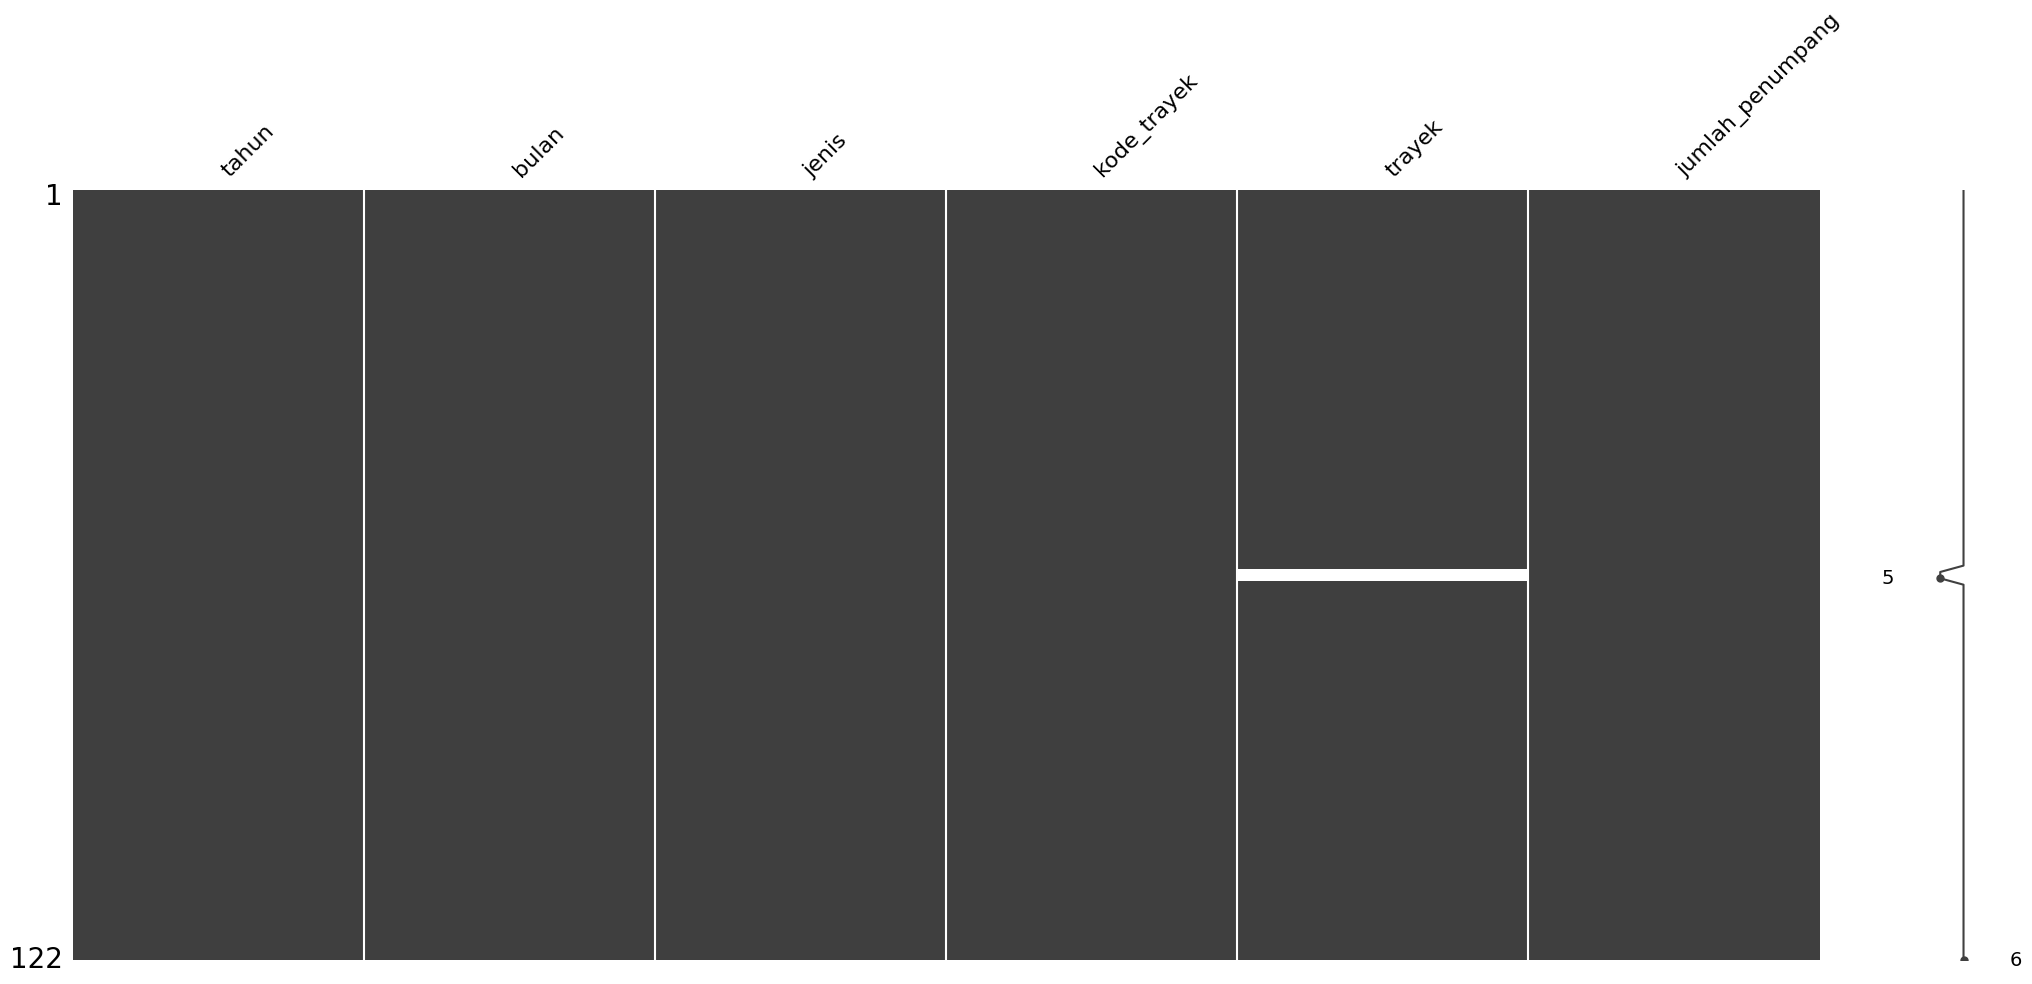

In [410]:
import missingno as msno

# menampilkan plot missing value
msno.matrix(df)


terlihat ada bagian yang tidak terisi yang telah sebelumnya di cek dengan fungsi isna() dan isnull, hal ini bisa terlihat pada observasi ke 5 pada variabel trayek

#### Mengatasi data NaN

disini saya menggunakan modus untuk menutupi data yang hilang pada variabel trayek  dengan alasan trayek adalah variabel string 

In [411]:
df.loc[df["trayek"].isnull(), "trayek"] = df["trayek"].mode()[0]

menampilkan kembali data dengan variabel df ,apakah sudah terisi yang sebelumnya NaN dengan nilai yang sering muncul(modus)

<Axes: >

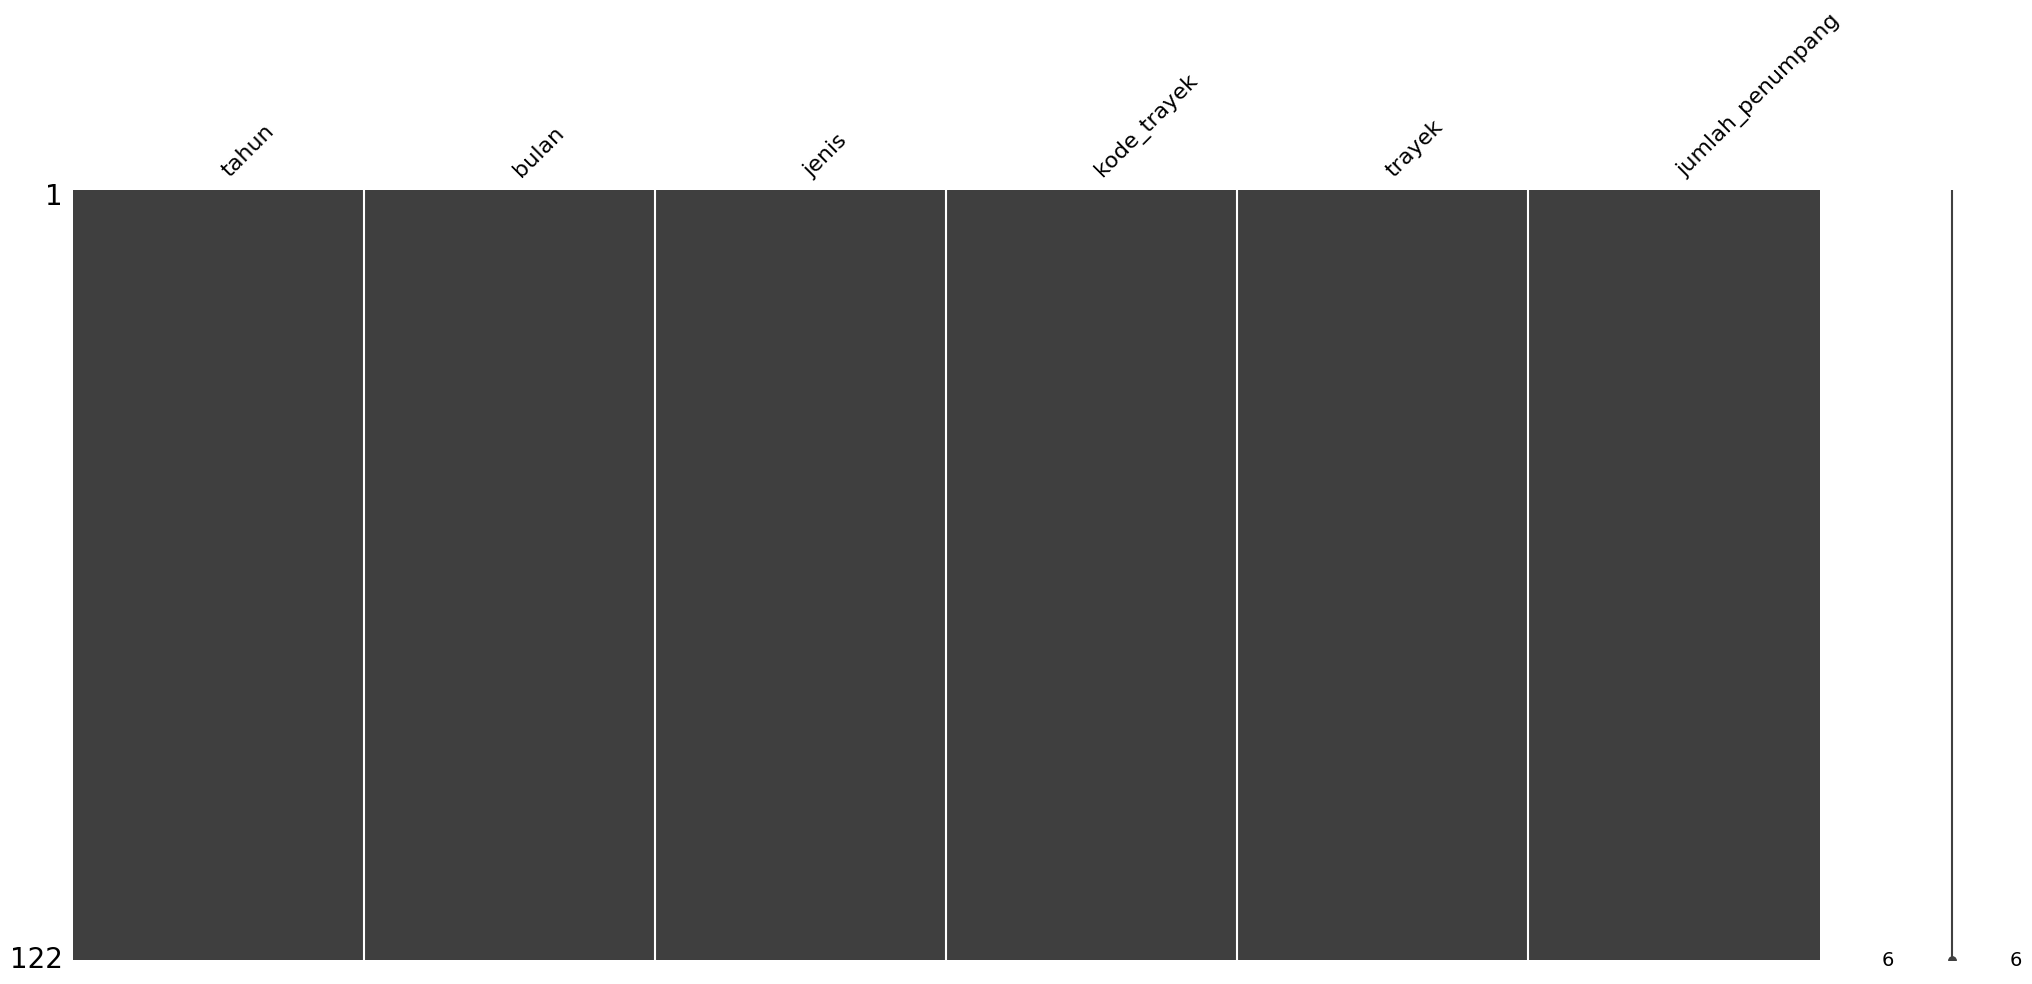

In [412]:
msno.matrix(df)

cek kembali NaN pada setiap variabel untuk memastikan saat mencari goals yang di inginkan tidak ada datang yang kosong(missing value)

In [413]:
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              0
jumlah_penumpang    0
dtype: int64

cek tipe data pada masing-masing varibel

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             122 non-null    int64 
 1   bulan             122 non-null    int64 
 2   jenis             122 non-null    object
 3   kode_trayek       122 non-null    object
 4   trayek            122 non-null    object
 5   jumlah_penumpang  122 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 5.8+ KB


Melihat outlier pada variabel yang bertipe float,int

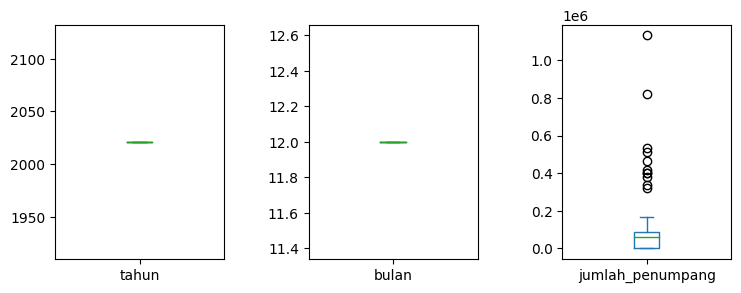

In [416]:
df_to_plot = df.select_dtypes(include=['float',int])
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5)

outlier hanya terdapat pada variabel jumlah_penumpang

#### melihat berapa banyak jenis kendaraan apa yang menjadi pilihan penumpang

Text(0.5, 1.0, 'berapa persen jumlah penumpang terhadap jenis kendaraan')

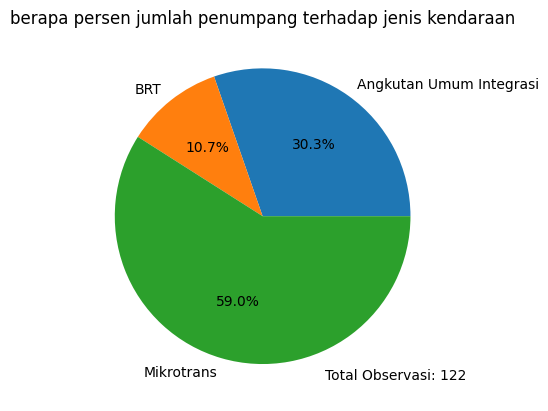

In [430]:
# Group the DataFrame by 'jenis' and calculate the count of observations for each group
df_counts = df.groupby('jenis')['jumlah_penumpang'].agg(['count']).reset_index()

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(df_counts['count'], labels=df_counts['jenis'], autopct='%1.1f%%')

# Add the count of observations as text on the chart
total_obs = df_counts['count'].sum()
ax.text(x=1.05, y=0.05, s=f'Total Observasi: {total_obs}', ha='right', va='bottom', transform=ax.transAxes)

plt.title('berapa persen jumlah penumpang terhadap jenis kendaraan')

pada data ini total observasi sebanyak 122, dengan kendaraan BRT,Mikrotrans,dan Angkutan umum. bisa lihat pada diagram pie diurutan pertama Mikrotrans menjadi pilihan paling banyak yang di pilih oleh penumpang dengan persentase sebanayak 59.0%,
lalu pada uruta kedua Angkutan Umum Integrasi menjadi pilihan kedua yang paling banyak di pilih oleh penumpang dengan persentase sebanyak 30.3%, dan urutan terakhir BRT menjadi kendaraan yang paling banyak dipakai penumpang dengan persentase 10.7% 

In [419]:
df["trayek"].value_counts()

Cililitan - Condet via Kayu Manis       4
Terminal Tanjung Priok - Ancol Barat    1
Roxy Mas - Karet                        1
Joglo - Blok M                          1
Bintaro - Blok M                        1
                                       ..
Pulo Gadung - Kota                      1
Rawamangun - Klender                    1
Pangkalan  Jati - Rawamangun            1
Cilangkap - Cililitan                   1
Tanjung Priok - Senen via Taman  BMW    1
Name: trayek, Length: 119, dtype: int64

pada variabel trayek menujukkan Cililitan - Condet via Kayu Manis sebagai lokasi yang  laing banyak ditujuh

In [421]:
df.describe()

,tahun,bulan,jumlah_penumpang
count,122.0,122.0,1.220000e+02
mean,2021.0,12.0,9.297152e+04
std,0.0,0.0,1.580677e+05
min,2021.0,12.0,0.000000e+00
25%,2021.0,12.0,0.000000e+00
50%,2021.0,12.0,6.125050e+04
75%,2021.0,12.0,8.675675e+04
max,2021.0,12.0,1.131439e+06


Rata-rata jumlah_penumpang selama periode tersebut adalah 92.971,52, dengan standar deviasi sebesar 158.067,7. Jumlah penumpang minimum adalah 0 dan maksimum mencapai 1.131.439. Quartil pertama (25%) adalah 0, sedangkan quartil ketiga (75%) adalah 86.756,75.

In [422]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('jumlah_penumpang ~ C(trayek)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                 sum_sq     df          F    PR(>F)
C(trayek)  3.018772e+12  118.0  17.206412  0.018473
Residual   4.460455e+09    3.0        NaN       NaN


Pada hasil uji ANOVA tersebut, kita dapat melihat adanya nilai F sebesar 17.206 dengan p-value sebesar 0.018, yang menunjukkan bahwa terdapat perbedaan signifikan antara setidaknya dua kelompok trayek dalam hal jumlah penumpang. Dengan demikian, kita dapat menolak hipotesis nol bahwa tidak ada perbedaan signifikan antara kelompok trayek dalam hal jumlah penumpang.

skewnes

In [438]:
df.skew()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17236\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


tahun               0.000000
bulan               0.000000
jumlah_penumpang    3.884609
dtype: float64

pada variabel tahun dan bulan dari data tersebut yang menghasilkan 0 menunjukkan bahwa di anggap simertris(tidak condong ke kanan atau kiri)
sedangkan pada variabel jumlah_penumpang dengan nilai 3.884609 cenderung condong ke kanan

In [431]:
df["jumlah_penumpang"].skew()

3.8846085816937186

In [432]:
df["tahun"].skew()

0

In [433]:
df["bulan"].skew()

0

kurtosis

In [429]:
df.kurt()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17236\1257127604.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


tahun                0.00000
bulan                0.00000
jumlah_penumpang    18.83038
dtype: float64

Dalam hal ini, nilai kurtosis jumlah_penumpang adalah 18.83038, yang mengindikasikan bahwa distribusi data cenderung sangat curam.

In [435]:
df["jumlah_penumpang"].kurt()

18.83038006865664

In [436]:
df["bulan"].kurt()

0

In [437]:
df["tahun"].kurt()

0